# MNIST 손글씨 - CNN4  

- 2 Conv2d layers with padding  
- 1 MaxPooling2 layer  
- 1 Dropout(0.25) lyaer  
- 1 Fully connected Network layer  
- 1 Dropyout(0.5) layer  
- 1 Output layer

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
 
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


0에서 1사이의 값으로 정규화 

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

3차원 데이터를 4차원으로 - 2차원은 3차원으로 

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

원 핫 인코딩 

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train,10)
Y_test = to_categorical(y_test,10)

Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의, 설정, 학습, 평가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape = (28,28,1), activation='relu'),    # padding='same'으로 주는게 패딩주는 것 
    Conv2D(64, (3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),                                                              # n차원을 1차원으로 변환
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(10,'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6423040   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
# 모델 실행 환경
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 모델 최적화를 위한 설정

In [ ]:
model_path = 'model/best_mnist_cnn_3.h5'
checkpoint = ModelCheckpoint(
    model_path, verbose=0, save_best_only=True
)
early_stopping = EarlyStopping(patience=5)

### 모델 학습 

In [ ]:
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=30, batch_size=200, verbose=0,
    callbacks=[checkpoint, early_stopping]
)

In [ ]:
from tensorflow.keras.models import load_model
best_model=load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9894


[0.02953447215259075, 0.9894000291824341]

### 훈련과정 시각화 

In [ ]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

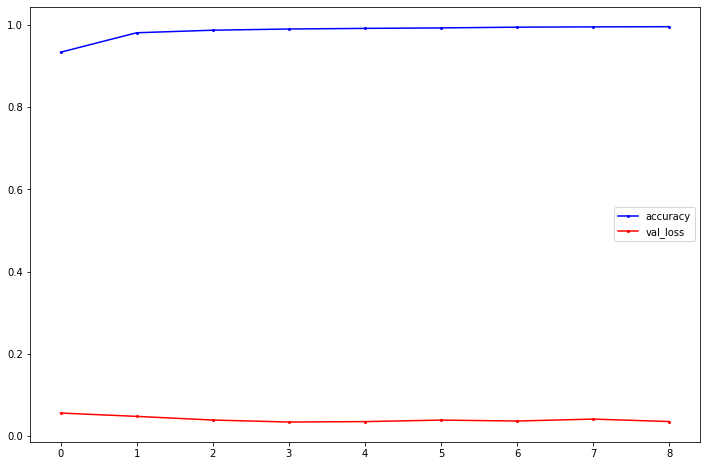

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()